# EDA

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

pd.set_option('display.max_column', 55)

### getting data

In [4]:
data = pd.read_csv('public_up_to_150k_12_220703.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599879 entries, 0 to 599878
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   599879 non-null  int64  
 1   DateApproved                 599879 non-null  object 
 2   SBAOfficeCode                599879 non-null  int64  
 3   ProcessingMethod             599879 non-null  object 
 4   BorrowerName                 599871 non-null  object 
 5   BorrowerAddress              599873 non-null  object 
 6   BorrowerCity                 599874 non-null  object 
 7   BorrowerState                599879 non-null  object 
 8   BorrowerZip                  599874 non-null  object 
 9   LoanStatusDate               549778 non-null  object 
 10  LoanStatus                   599879 non-null  object 
 11  Term                         599879 non-null  int64  
 12  SBAGuarantyPercentage        599879 non-null  int64  
 13 

### checking for nulls

In [7]:
data.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        8
BorrowerAddress                     6
BorrowerCity                        5
BorrowerState                       0
BorrowerZip                         5
LoanStatusDate                  50101
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                 178
FranchiseName                  591645
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [8]:
data = data[data.BorrowerName.notnull()]

In [11]:
data.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        0
BorrowerAddress                     6
BorrowerCity                        5
BorrowerState                       0
BorrowerZip                         5
LoanStatusDate                  50100
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                 178
FranchiseName                  591637
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

### add few more columns to our data for analysis

In [14]:
data['year_approved'] = pd.DatetimeIndex(data['DateApproved']).year

In [22]:
data['month_approved'] = pd.DatetimeIndex(data['DateApproved']).month

In [23]:
data['year_forgiven'] = pd.DatetimeIndex(data['ForgivenessDate']).year

In [24]:
data['month_forgiven'] = pd.DatetimeIndex(data['ForgivenessDate']).month

### processing method -- pps

In [26]:
pps = data.loc[data['ProcessingMethod'] == 'PPS' ]

In [30]:
pps.sample(20)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,...,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
316438,1831698407,02/02/2021,1094,PPS,RICHARD M OSTROM PSYD LLC,6855 W Clearwater Ave Ste B,Kennewick,WA,99336-1720,03/19/2022,Paid in Full,60,100,13606.00,13606.00,0.0,NaN,121536,Customers Bank,99 Bridge St,PHOENIXVILLE,PA,19460-3411,U,N,Y,Existing or more than 2 years old,...,99336-1720,WA-04,1.0,621420.0,Unanswered,Unknown/NotStated,1.0,13603.00,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),529113,"Kabbage, Inc.",Atlanta,GA,Unanswered,Unanswered,NaN,13742.43,02/07/2022,2021,2,2022.0,2.0
401948,2551918303,01/21/2021,563,PPS,LAKELAND LUMBER & HARDWARE INC.,7220 State Highway 47,Lake Tomahawk,WI,54539-9336,09/24/2021,Paid in Full,60,100,49577.00,49577.00,0.0,True Value Company LLC - Member Agreement,203327,Nicolet National Bank,111 N Washington St,GREEN BAY,WI,54301-4255,R,N,N,Existing or more than 2 years old,...,54539-9336,WI-07,9.0,444130.0,Unanswered,Not Hispanic or Latino,NaN,49577.00,NaN,NaN,NaN,NaN,NaN,Corporation,203327,Nicolet National Bank,GREEN BAY,WI,Unanswered,Unanswered,NaN,49837.28,08/04/2021,2021,1,2021.0,8.0
563654,6854758505,03/04/2021,390,PPS,GREEN REVOLUTION JUICING LLC,132 Stoneheath Dr 132 Stoneheath Dr,Barboursville,WV,25504-1055,11/11/2021,Paid in Full,60,100,14980.00,14980.00,0.0,NaN,44449,"PNC Bank, National Association",222 Delaware Ave,WILMINGTON,DE,19801-1621,U,N,N,Existing or more than 2 years old,...,25504-1055,WV-03,6.0,722515.0,Asian,Unknown/NotStated,NaN,14979.00,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),44449,"PNC Bank, National Association",WILMINGTON,DE,Unanswered,Unanswered,NaN,15069.88,10/08/2021,2021,3,2021.0,10.0
141060,3203848402,02/04/2021,353,PPS,C & P BAMBOO LLC,21100 Dulles Town Cir Ste 229,Sterling,VA,20166-2488,03/19/2022,Paid in Full,60,100,7253.00,7253.00,0.0,NaN,121536,Customers Bank,99 Bridge St,PHOENIXVILLE,PA,19460-3411,U,Y,Y,Existing or more than 2 years old,...,20166-2488,VA-10,2.0,448140.0,White,Unknown/NotStated,1.0,7250.00,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),529113,"Kabbage, Inc.",Atlanta,GA,Female Owned,Non-Veteran,NaN,7288.37,08/04/2021,2021,2,2021.0,8.0
4985,6060928408,02/10/2021,304,PPS,OLIVIA FOOD INC,13245 Rittenhouse Drive 13245 Rittenhouse Drive,Midlothian,VA,23112,12/10/2021,Paid in Full,60,100,73199.00,73199.00,0.0,NaN,122517,Atlantic Union Bank,"1051 E Cary St, Ste 103",RICHMOND,VA,23219-4029,U,N,N,Existing or more than 2 years old,...,23112,VA-04,16.0,722511.0,Unanswered,Unknown/NotStated,NaN,73199.00,NaN,NaN,NaN,NaN,NaN,Corporation,122517,Atlantic Union Bank,RICHMOND,VA,Unanswered,Unanswered,NaN,73768.33,11/22/2021,2021,2,2021.0,11.0
576846,8556038807,04/22/2021,897,PPS,WONDER COSMETICS LLC,30 N Gould St,Sheridan,WY,82801-6317,04/19/2022,Paid in Full,60,100,125000.00,125000.00,0.0,NaN,456756,Cross River Bank,885 Teaneck Rd,TEANECK,NJ,07666-4546,R,N,N,Existing or more than 2 years old,...,82801-6317,WY-,8.0,453998.0,Black or African American,Not Hispanic or Latino,NaN,125000.00,NaN,NaN,NaN,NaN,NaN,Partnership,456756,Cross River Bank,TEANECK,NJ,Male Owned,Non-Veteran,NaN,126130.14,03/30/2022,2021,4,2022.0,3.0
381564,4232038301,01/23/2021,563,PPS,AUDIO-VISUAL OF MILWAUKEE INC.,

### processing method -- ppp

In [28]:
ppp = data.loc[data['ProcessingMethod'] == 'PPP' ]

In [29]:
ppp.sample(20)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,...,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
3372,6411377002,04/06/2020,304,PPP,"ARMOR FENCE, LLC",9414 PRINCE WILLIAM ST,MANASSAS,VA,20110-5666,04/21/2021,Paid in Full,24,100,76600.00,76600.00,0.0,NaN,73092,Bank of Clarke County,2 E Main St,BERRYVILLE,VA,22611-1338,U,Y,Y,Existing or more than 2 years old,...,20110-5666,VA-10,4.0,238990.0,Unanswered,Unknown/NotStated,NaN,76600.00,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),73092,Bank of Clarke County,BERRYVILLE,VA,Male Owned,Unanswered,NaN,77319.19,03/25/2021,2020,4,2021.0,3.0
84039,1721418000,06/23/2020,304,PPP,SHANTEL GRAVES,811 Briar Hill Road,Norfolk,VA,23502-3554,08/10/2021,Paid in Full,60,100,19428.00,19428.00,0.0,NaN,223542,Celtic Bank Corporation,"268 S State St, Ste 300",SALT LAKE CITY,UT,84111-5314,U,N,Y,New Business or 2 years or less,...,23502-3554,VA-02,1.0,721199.0,Unanswered,Unknown/NotStated,NaN,19428.00,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,223542,Celtic Bank Corporation,SALT LAKE CITY,UT,Unanswered,Unanswered,NaN,19630.26,07/09/2021,2020,6,2021.0,7.0
69085,1752268801,04/10/2021,353,PPP,DAVID BOYD,37381 Snickersville Tpke,Purcellville,VA,20132-5001,NaN,Exemption 4,60,100,20832.00,20832.00,0.0,NaN,12096,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104-6738,U,N,N,Existing or more than 2 years old,...,20132-5001,VA-10,1.0,518210.0,White,Not Hispanic or Latino,NaN,20832.00,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,12096,"Wells Fargo Bank, National Association",SIOUX FALLS,SD,Male Owned,Veteran,NaN,NaN,NaN,2021,4,NaN,NaN
335574,6967258101,07/22/2020,1013,PPP,LOWE PARKER CORPORATION,3841 1ST AVE S,SEATTLE,WA,98134-2203,04/16/2021,Paid in Full,60,100,9375.00,9375.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,Y,N,Existing or more than 2 years old,...,98134-2203,WA-07,2.0,453998.0,Unanswered,Unknown/NotStated,NaN,9375.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN,9437.67,03/24/2021,2020,7,2021.0,3.0
138466,3542468901,04/28/2021,353,PPP,IN JOO JUNG,14354 Silo Valley Vw,Centreville,VA,20121-2350,02/18/2022,Paid in Full,60,100,7612.00,7612.00,0.0,NaN,529471,Itria Ventures LLC,"One Penn Plaza, Suite 4530",New York,NY,10119,U,N,N,Existing or more than 2 years old,...,20121-2350,VA-11,1.0,812112.0,Asian,Not Hispanic or Latino,1.0,7607.00,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,529471,Itria Ventures LLC,New York,NY,Female Owned,Non-Veteran,NaN,7662.54,01/13/2022,2021,4,2022.0,1.0
25337,2483028206,08/02/2020,353,PPP,IGMODEL LLC,8900 CROSSPOINTE GLEN WAY,LORTON,VA,22079-4413,08/18/2021,Paid in Full,60,100,42750.00,42750.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,...,22079-4413,VA-11,5.0,541870.0,Unanswered,Unknown/NotStated,NaN,42750.00,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN,43138.85,07/02/2021,2020,8,2021.0,7.0
168199,6223357402,05/14/2020,353,PPP,"BREAKERASSIST, LLC",12019 WATERSIDE VIEW DR APT 11,RESTON

### Categorical Variables

### Univariable

C:\Users\md tohidul islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProcessingMethod', ylabel='count'>

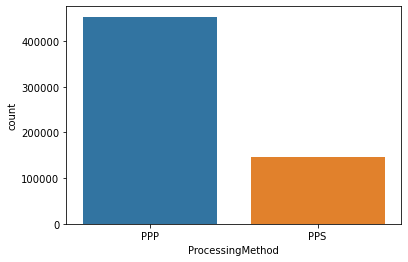

In [31]:
sns.countplot(data.ProcessingMethod)

C:\Users\md tohidul islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BorrowerState', ylabel='count'>

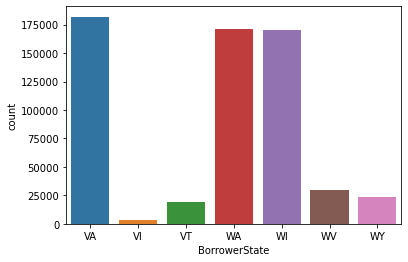

In [33]:
sns.countplot(data.BorrowerState)

C:\Users\md tohidul islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

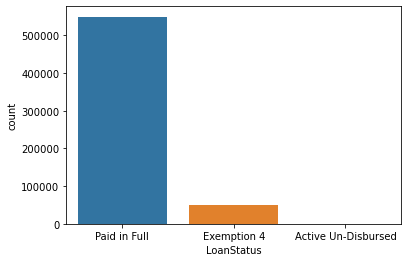

In [34]:
sns.countplot(data.LoanStatus)

C:\Users\md tohidul islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

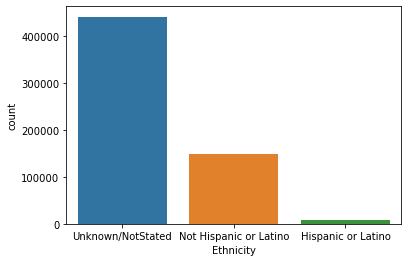

In [35]:
sns.countplot(data.Ethnicity)

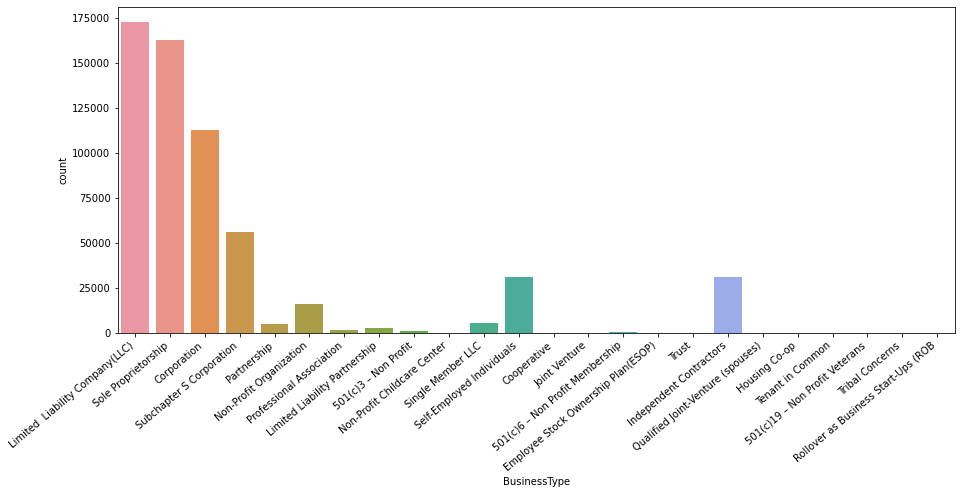

In [36]:
plt.figure(figsize = (15, 6))
ax = sns.countplot(x = 'BusinessType', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha='right')
plt.show()

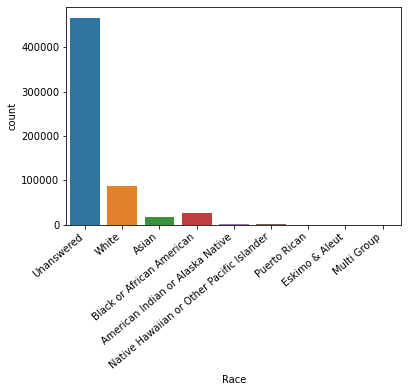

In [37]:
ax = sns.countplot(x='Race', data= data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha = 'right')
plt.show()

### BiVariate

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

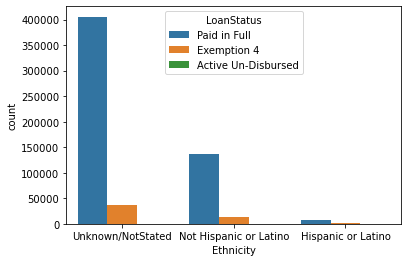

In [38]:
# ploting ETHNICITY against LOANSTATUS.
sns.countplot(x = 'Ethnicity', hue = 'LoanStatus', data = data )

### cross tabulation

In [41]:
pd.crosstab(data['year_approved'], data['BorrowerState'])

BorrowerState,VA,VI,VT,WA,WI,WV,WY
year_approved,,,,,,,
2020,86730,1864,10785,90871,76659,15687,12161
2021,95186,1249,8645,80609,93805,14265,11355


In [42]:
pd.crosstab(data['Ethnicity'], data['BorrowerState'])

BorrowerState,VA,VI,VT,WA,WI,WV,WY
Ethnicity,,,,,,,
Hispanic or Latino,2753,163,74,3661,1761,158,403
Not Hispanic or Latino,39449,891,4990,40170,47726,9499,6095
Unknown/NotStated,139714,2059,14366,127649,120977,20295,17018


In [43]:
pd.crosstab(data.Ethnicity, data.LoanStatus)

LoanStatus,Active Un-Disbursed,Exemption 4,Paid in Full
Ethnicity,,,
Hispanic or Latino,0,1020,7953
Not Hispanic or Latino,4,12651,136165
Unknown/NotStated,3,36429,405646


### Numeric Variables

In [44]:
data.CurrentApprovalAmount.describe()

count    599871.000000
mean      27250.259802
std       28315.811342
min           1.800000
25%        8600.000000
50%       19377.000000
75%       33327.000000
max      149999.990000
Name: CurrentApprovalAmount, dtype: float64

C:\Users\md tohidul islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CurrentApprovalAmount'>

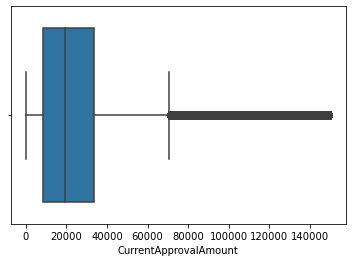

In [45]:
sns.boxplot(data.CurrentApprovalAmount)

<AxesSubplot:xlabel='LoanStatus', ylabel='CurrentApprovalAmount'>

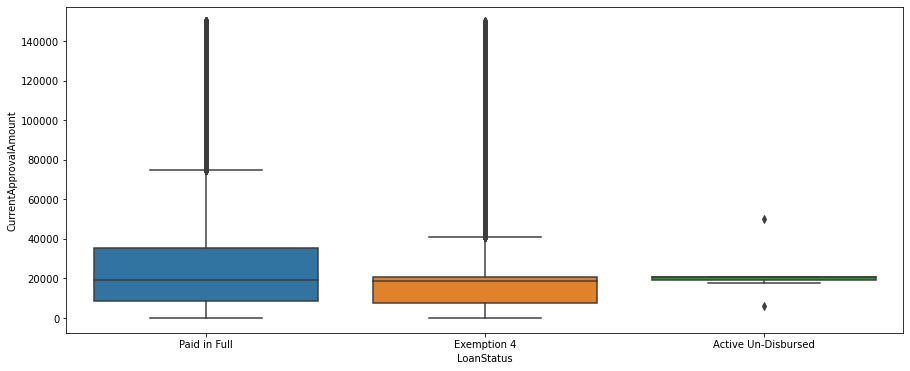

In [48]:
plt.figure(figsize = (15, 6))
sns.boxplot(x = 'LoanStatus', y = 'CurrentApprovalAmount', data = data)

C:\Users\md tohidul islam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CurrentApprovalAmount', ylabel='Density'>

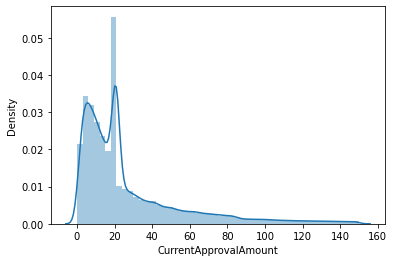

In [51]:
sns.distplot(data['CurrentApprovalAmount']/10**3)

In [52]:
data['CurrentApprovalAmount'].skew()

1.958542058839005

In [53]:
data['CurrentApprovalAmount'].kurt()

3.808650182874175

In [54]:
matrix = data.corr()

<AxesSubplot:>

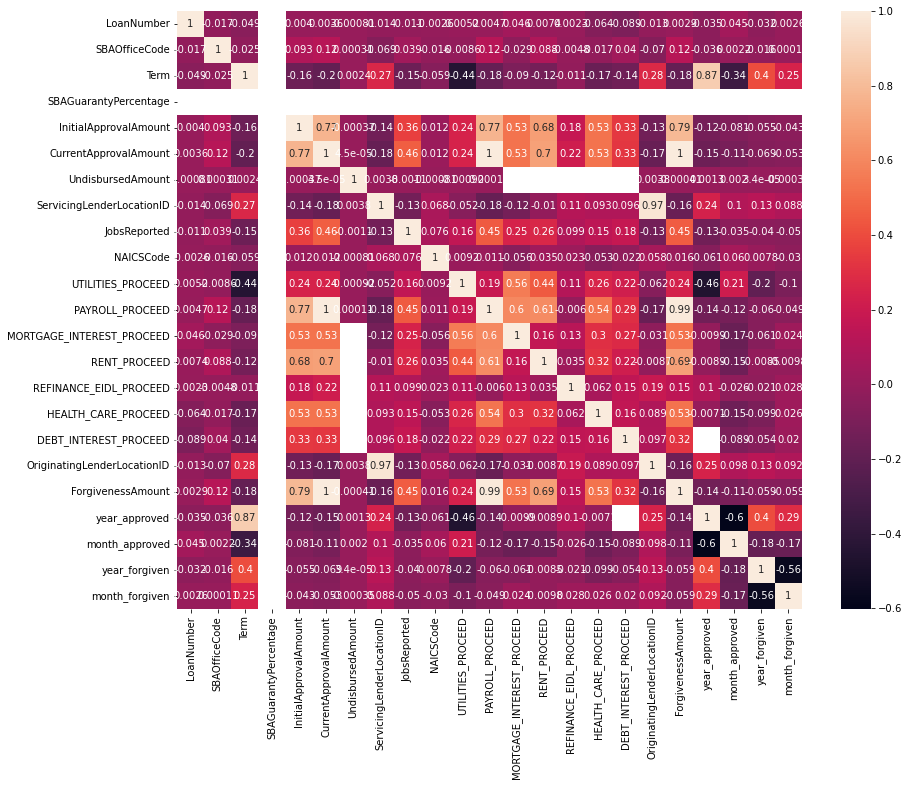

In [62]:
plt.figure(figsize = (14,11))
sns.heatmap(matrix, annot = True)

#####  header